# Convolutional Neural Networks (CNN) Classification for Simpsons Characters
Author: Gregorio Mendoza Serrano
---

In this activity, we will work with Convolutional Neural Networks (CNNs) to solve an image classification problem. Specifically, we will classify images of characters from *The Simpsons*.

<center><img src="https://i.imgur.com/i8zIGqX.jpg" style="text-align: center" height="300px"></center>

The dataset consists of images of characters from the show, extracted directly from episodes. This dataset has been compiled by Alexandre Attia. Among the 18 labeled characters, they appear in various poses, different positions within the image, or alongside other characters on-screen (although the character to be classified is always in the dominant position).

The dataset and additional information can be downloaded from the following link:

[The Simpsons Character Recognition Using Keras](https://medium.com/alex-attia-blog/the-simpsons-character-recognition-using-keras-d8e1796eae36)


---

## Importing Libraries
Let's first load some of the necessary libraries to run the notebook:

In [3]:
## Librerías utilizadas
import cv2
import os
import numpy as np
import keras
from tensorflow import keras
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

---

# 0. Importing Images from Local Location
We define the mapping of characters against the true categorical label number for each of them:

Note: The chosen image size for processing is 64x64, so that we keep the images at a reduced size for faster processing.

In [4]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 64

We define the local file locations for the train and test datasets:


In [5]:
dirname_train = 'simpsons_train/simpsons'
dirname_test = 'simpsons_testset/simpsons'



We define the function for importing and post-processing the training images:



In [6]:
def load_train_set(dirname, map_characters, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

We define the function for importing and post-processing the test images:

In [7]:
def load_test_set(dirname, map_characters, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(os.path.basename(filename).split('_')[:-1])
        # char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)




We import the training dataset into two arrays, one for the images and one for their labels:

In [8]:
DATASET_TRAIN_PATH_COLAB = dirname_train

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob



Similarly, we import the test dataset into two arrays, one for the images and one for their labels:

In [9]:
DATASET_TEST_PATH_COLAB = dirname_test
X_t, y_t = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leídas 890 imágenes de test


We check the dimensions of the resulting arrays:

In [10]:
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)
print("X_t.shape: ", X_t.shape)
print("y_t.shape: ", y_t.shape)

X.shape:  (18992, 64, 64, 3)
y.shape:  (18992,)
X_t.shape:  (890, 64, 64, 3)
y_t.shape:  (890,)



We will leave the dimensions of the label arrays as they are (no categorical encoding will be applied). Later, we will explain how this will be handled in the solution.

As a verification step, we display one of the training images selected randomly, along with its categorical label and the character's name:

Nombre del personaje:  homer_simpson
Etiqueta del personaje:  7


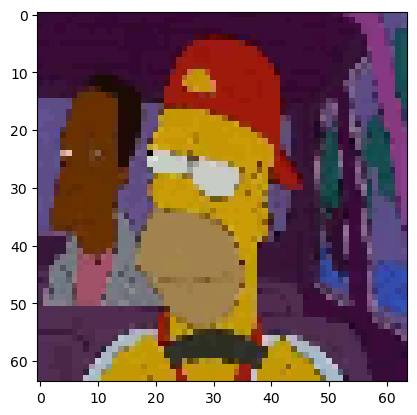

In [11]:
index_sample_img = 6005

plt.imshow(X[index_sample_img])
print("Nombre del personaje: ", MAP_CHARACTERS[y[index_sample_img]])
print("Etiqueta del personaje: ", y[index_sample_img])



Similarly, we display one of the test images selected randomly, along with its categorical label and the character's name:

Nombre del personaje:  bart_simpson
Etiqueta del personaje:  2


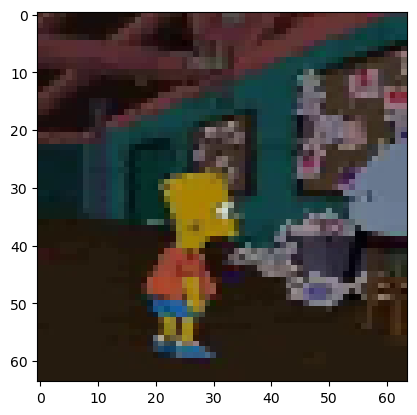

In [12]:
index_sample_img = 130

plt.imshow(X_t[index_sample_img])
print("Nombre del personaje: ", MAP_CHARACTERS[y_t[index_sample_img]])
print("Etiqueta del personaje: ", y_t[index_sample_img])


---

# 2. Training, Validation, and Test Sets
With the arrays created in the previous section, we will define the necessary sets for training, validation, and testing our image recognition algorithms.

The <font color='IndianRed'>**training set**</font> (`train`) is the dataset we use to teach the neural network model which Simpsons character is present in the image. This set will be obtained from the arrays `X` (images) and `y` (true labels) and will contain 80% of the images.

The <font color='IndianRed'>**validation set**</font> (`validation`) consists of Simpsons frames the algorithm won’t see during training. It will be used to evaluate the model's performance during each training iteration (epoch). This set will be obtained from the arrays `X` (images) and `y` (true labels) and will contain 20% of the images.

The <font color='IndianRed'>**test set**</font> (`test`) will be used to finally assess the algorithm's performance on unseen images. Testing accuracy and the confusion matrix derived from this prediction will be the final objective of this exercise. This set will be derived from the arrays `X_t` (images) and `y_t` (true labels).

We define the training, validation, and test sets using TensorFlow's `ImageDataGenerator`.

From the outset, we will apply *Data Augmentation* to reduce overfitting on our training images:
  - `horizontal_flip=True` leverages the mostly symmetrical nature of the characters, assuming they are always in an upright position.
  - `rescale=1.0/255` normalizes pixel values to the range [0, 1] by dividing by 255, common practice since original values are in [0, 255].
  - `rotation_range=30` randomly rotates the images within a range of 0 to 30 degrees, helping the model become invariant to such rotations.
  - `width_shift_range=0.2` randomly shifts images horizontally within 20% of the image width.
  - `height_shift_range=0.2` randomly shifts images vertically within 20% of the image height.
  - `shear_range=0.2` applies a shear transformation, with the value 0.2 representing the shear angle in radians.
  - `zoom_range=0.2` randomly zooms into or out of images within a 20% range.
  - `fill_mode='nearest'` fills in empty pixels after a transformation by using the value of the nearest pixel.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dividir los datos en entrenamiento y validación utilizando train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)

# Definir el generador de datos para el entrenamiento con data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,  # Flip horizontal
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Definir el generador de datos para la validación (sin data augmentation)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Definir el generador de datos para test (sin data augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

We import data into the previously defined datasets using `.flow()`.
We also define a `batch_size` of 32 images for training and validation.

In [14]:
# Especificar los parámetros del generador de lotes
batch_size = 32
train_generator = train_datagen.flow(X_train, y_train, batch_size = batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size = batch_size)
test_generator = test_datagen.flow(X_t, y_t, shuffle = True)

As a verification step, we will display the content of a batch of training images.

The goal of this visualization is to check that the classes are mixed, the images look acceptable, and that the modifications applied as part of data augmentation are being executed properly.

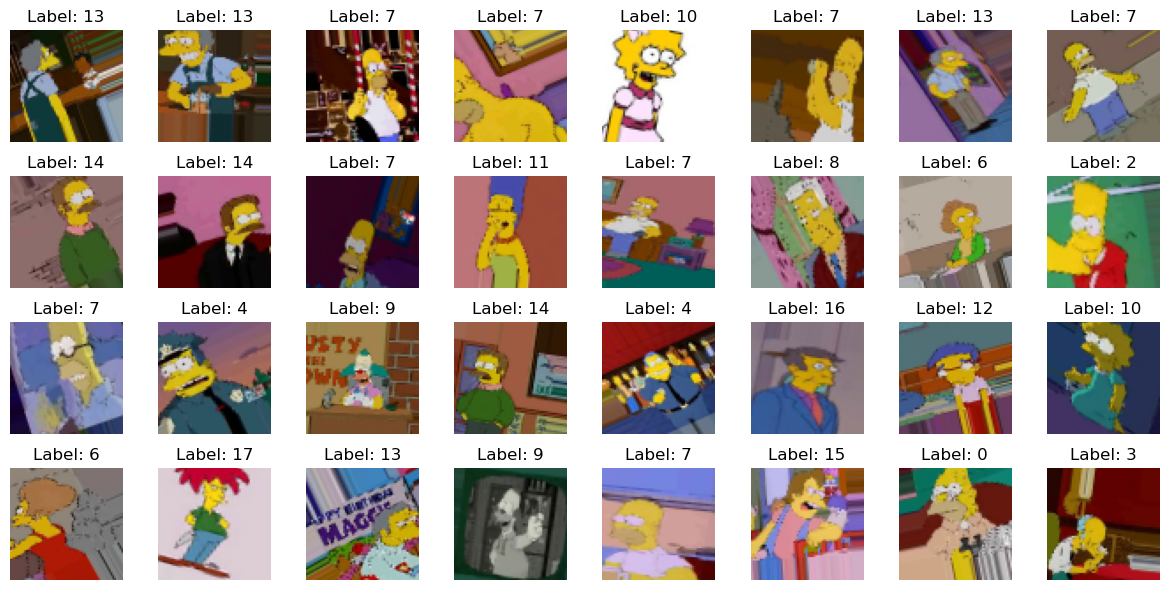

In [15]:
# Get a batch of data
x_batch, y_batch = next(train_generator)

num_samples = 32

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    # Extract image and label
    image = x_batch[i]
    label = y_batch[i]

    # Plot image
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")

    # Turn off axis
    axes[i].axis('off')

plt.tight_layout()
plt.show()

---


## 3. Architecture Design: Selection of Suitable Deep Neural Network Architectures

When developing the classification using CNNs, we will study two different architectures:

1. <font color='sky blue'>**Model 1:**</font> A simple CNN with 4 convolutional and pooling blocks [sequence of 32, 64, 128 and 256 filters] followed by a dense layer of 1024 neurons with a subsequent dropout of 50%, and a final layer of 18 neurons to perform the classification.
   Each of the 'convolutional blocks' is composed of the following elements:
   
      - Convolutional layer (3x3), same padding to maintain image size, and ReLU activation function.
      - Second convolutional layer (3x3) and ReLU activation function.
      - Max pooling layer that reduces the spatial dimensions (width and height) of the image by half.
      - Dropout layer that randomly turns off 30% of the units during training to prevent overfitting.

2. <font color='sky blue'>**Model 2:**</font> A simplified Xception-type CNN, with 2 blocks of depthwise separable convolutions, iterated with a sequence of [32, 64, 128, 128, 256] filters, which separates spatial and channel convolutions, and then three dense convolutional layers: one of 1024 and another of 256 neurons, both with a dropout of 50%, and a final layer of 18 neurons to perform the classification.
   The choice of this model is based on its effectiveness in detecting details in image borders and edges (which is the case of our dataset, since the images are very well defined).
### 3.1 **Model 1:** Deep simple CNN (4 convolutional blocks + 2 dense layers)

Let's first define the input image size: 



In [16]:
image_size = (IMG_SIZE, IMG_SIZE, 3)

Let's now create the model:

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model_CNN = Sequential()
model_CNN.add(Conv2D(32, (3, 3), padding='same', input_shape=image_size, activation="relu"))
model_CNN.add(Conv2D(32, (3, 3), activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2))) 
model_CNN.add(Dropout(0.3)) 

model_CNN.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model_CNN.add(Conv2D(64, (3, 3), activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.3))

model_CNN.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model_CNN.add(Conv2D(128, (3, 3), activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.3))

model_CNN.add(Conv2D(256, (3, 3), padding='same', activation="relu")) 
model_CNN.add(Conv2D(256, (3, 3), activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.3))

model_CNN.add(Flatten())  
model_CNN.add(Dense(1024, activation="relu"))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(18, activation='softmax'))

c:\Users\grego\anaconda3\envs\tf_Environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's print the model summary and compile the model afterwards:

In [18]:
model_CNN.summary()  

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │        18,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,240,306 (8.55 MB)

 Trainable params: 2,240,306 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.optimizers import Adam

model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])


Note: we use `loss='sparse_categorical_crossentropy'` because our label vectors contain a single dimension with integer format labels of the images, instead of a matrix with categorical encoding of 18 columns with one-hot encoding (in that case we would use `loss='categorical_crossentropy'`).

### 3.2 **Model 2:** Simplified Xception Model.
We first create the model:


In [20]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(inputs)

for size in [32, 64, 128, 128, 256]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(18, activation="softmax")(x)

model_Xception = keras.Model(inputs=inputs, outputs=outputs)

Let's print the model summary and compile the model afterwards:

In [21]:
model_Xception.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 62, 62,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 62, 62,    │        128 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 62, 62,    │      1,312 │ activation[0][0]  │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 62, 62,    │      1,312 │ activation_1[0][… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 31, 31,    │          0 │ separable_conv2d… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 31, 31,    │      1,024 │ conv2d_8[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 31, 31,    │          0 │ max_pooling2d_4[… │
│                     │ 32)               │            │ conv2d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        128 │ add[0][0]         │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 31, 31,    │      2,336 │ activation_2[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_3  │ (None, 31, 31,    │      4,672 │ activation_3[0][

 Total params: 768,210 (2.93 MB)

 Trainable params: 766,226 (2.92 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [22]:
model_Xception.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.0001), metrics=['accuracy'])

## 4. Training the Models
Now we will train both models with 80% of the images for 100 epochs, and we will monitor the accuracy using 20% of the images, which are contained in the validation set.

We will obtain 4 values per epoch: Loss, Accuracy, Validation Loss, and Validation Accuracy.

Loss and accuracy are important indicators of progress during training. Loss measures the model's current prediction against the known labels, calculating the result. Accuracy, on the other hand, is the proportion of correct predictions.

Note: To run the training in the blocks below, you need to set `retrain_model = True` in block [78].



In [23]:
retrain_model=True

### 4.1 **Training Model 1:** Simple Deep CNN (4 Convolutional Blocks + 2 Dense Layers)
Using TensorFlow's callbacks, we will keep the model with the highest `Validation Accuracy` obtained during the 100 epochs and export it to an external file with the .keras extension:


In [24]:
if retrain_model==True:

    callbacks_model_CNN = [
        keras.callbacks.ModelCheckpoint(
            filepath="model_CNN.keras",
            save_best_only=True,
            monitor="val_accuracy")
    ]

Let's launch the training:

In [25]:
if retrain_model==True:

    history_Model_CNN = model_CNN.fit(
        train_generator,
        epochs=100,
        validation_data=val_generator,
        callbacks=callbacks_model_CNN)

Epoch 1/100


c:\Users\grego\anaconda3\envs\tf_Environment\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


475/475 ━━━━━━━━━━━━━━━━━━━━ 133s 264ms/step - accuracy: 0.1145 - loss: 2.8140 - val_accuracy: 0.1637 - val_loss: 2.7090
Epoch 2/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 127s 266ms/step - accuracy: 0.1730 - loss: 2.6356 - val_accuracy: 0.2874 - val_loss: 2.2903
Epoch 3/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 127s 265ms/step - accuracy: 0.2470 - loss: 2.3874 - val_accuracy: 0.3819 - val_loss: 1.9136
Epoch 4/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 126s 263ms/step - accuracy: 0.3299 - loss: 2.0994 - val_accuracy: 0.5093 - val_loss: 1.5998
Epoch 5/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 128s 267ms/step - accuracy: 0.4253 - loss: 1.8486 - val_accuracy: 0.5696 - val_loss: 1.4499
Epoch 6/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 127s 266ms/step - accuracy: 0.4902 - loss: 1.6498 - val_accuracy: 0.6365 - val_loss: 1.1986
Epoch 7/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 134s 282ms/step - accuracy: 0.5536 - loss: 1.4467 - val_accuracy: 0.6986 - val_loss: 1.0282
Epoch 8/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 127s 265ms/step - accuracy: 0.5892 - los

We plot the training progress to see the evolution of the metrics across the epochs:

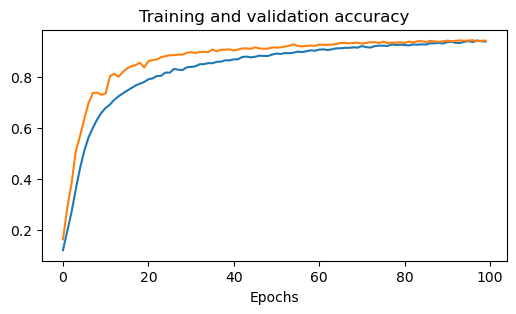

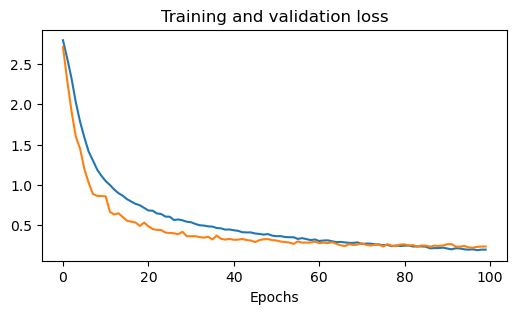

In [26]:
if retrain_model == True:
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history_Model_CNN.history['accuracy']
    val_acc  = history_Model_CNN.history['val_accuracy']
    loss     = history_Model_CNN.history['loss']
    val_loss = history_Model_CNN.history['val_loss']

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.xlabel('Epochs')
    print('\n')

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    plt.xlabel('Epochs')

It can be observed that starting from approximately epoch 80, the training accuracy continues to rise and the training loss continues to decrease, while both metrics remain stagnant for the test set: This indicates that the model is functioning at full capacity.

### 4.2 **Training Model 2:** Simplified Xception Model
Using TensorFlow's callbacks, we will keep the model with the highest `Validation Accuracy` obtained during the 100 epochs and export it to an external file with the .keras extension:

In [27]:
if retrain_model==True:

    callbacks_model_Xception = [
        keras.callbacks.ModelCheckpoint(
            filepath="model_Xception.keras",
            save_best_only=True,
            monitor="val_accuracy")
    ]

Let's launch the training:

In [28]:
if retrain_model==True:

    history_Model_Xception = model_Xception.fit(
        train_generator,
        epochs=100,
        validation_data=val_generator,
        callbacks=callbacks_model_Xception)

Epoch 1/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 118s 212ms/step - accuracy: 0.1088 - loss: 2.8079 - val_accuracy: 0.1127 - val_loss: 2.8123
Epoch 2/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 100s 209ms/step - accuracy: 0.2088 - loss: 2.4793 - val_accuracy: 0.3825 - val_loss: 1.9069
Epoch 3/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 101s 211ms/step - accuracy: 0.3546 - loss: 2.0332 - val_accuracy: 0.4246 - val_loss: 1.8965
Epoch 4/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 101s 211ms/step - accuracy: 0.4773 - loss: 1.6679 - val_accuracy: 0.5780 - val_loss: 1.3474
Epoch 5/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 102s 214ms/step - accuracy: 0.5534 - loss: 1.4470 - val_accuracy: 0.6262 - val_loss: 1.2288
Epoch 6/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 111s 233ms/step - accuracy: 0.6184 - loss: 1.2382 - val_accuracy: 0.7199 - val_loss: 0.9048
Epoch 7/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 105s 219ms/step - accuracy: 0.6582 - loss: 1.1279 - val_accuracy: 0.7415 - val_loss: 0.8606
Epoch 8/100
475/475 ━━━━━━━━━━━━━━━━━━━━ 102s 214ms/step - accuracy: 

We plot the training progress to see the evolution of the metrics across the epochs:


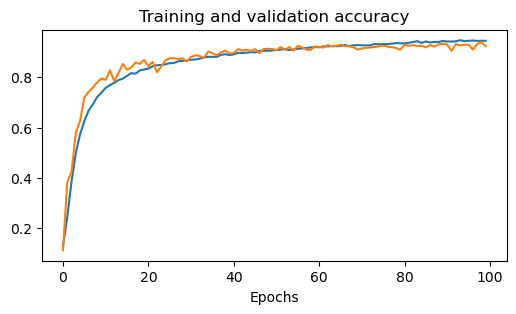

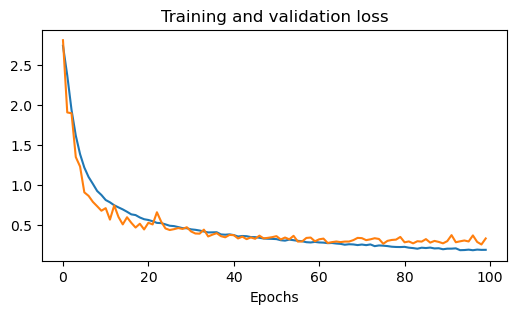

In [29]:
if retrain_model == True:
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history_Model_Xception.history['accuracy']
    val_acc  = history_Model_Xception.history['val_accuracy']
    loss     = history_Model_Xception.history['loss']
    val_loss = history_Model_Xception.history['val_loss']

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.xlabel('Epochs')
    print('\n')

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    plt.xlabel('Epochs')

It can be observed that starting from approximately epoch 60, the training accuracy continues to rise and the training loss continues to decrease, while both metrics remain stagnant for the test set: This indicates that the model is functioning at full capacity.

---

## 5. Evaluation of the Models on the Test Set
In the following subsections, we will make predictions on the test set `X_t` and compare the labels predicted by the models against the true labels `y_t`, in order to calculate the test accuracy or 'Test Accuracy.'  
As can be seen, both models yield a test accuracy of around 98%, much higher than what would be intuitively expected in the problem setup. The Simple Deep CNN model (Model 1) appears to be slightly superior in test accuracy (by tenths). This is judged to be not significant enough to consider it superior, as it could fall within the range of random variation when examining a test set of different origin.

### 5.1 **Evaluation of Model 1:** Simple Deep CNN (4 Convolutional Blocks + 2 Dense Layers)

In [30]:
test_model_CNN = keras.models.load_model("model_CNN.keras")
test_loss_CNN, test_acc_CNN = test_model_CNN.evaluate(test_generator)
print(f"Test accuracy: {test_acc_CNN:.3f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9869 - loss: 0.0476
Test accuracy: 0.984


### 5.2 **Evaluation of Model 2:** Simplified Xception Model

In [31]:
test_model_Xception = keras.models.load_model("model_Xception.keras")
test_loss_Xception, test_acc_Xception = test_model_Xception.evaluate(test_generator)
print(f"Test accuracy: {test_acc_Xception:.3f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9718 - loss: 0.0966
Test accuracy: 0.970


## 6. Confusion Matrix and Associated Metrics:
In order to assess the performance of each model on each individual characteristic of the dataset, we need to examine the confusion matrices obtained from the test set:
  
To start, we make a copy of the true labels:  

In [32]:
y_true = y_t.copy()

 
As a check, we print out the classes present in the test set and the distribution of samples across the classes:

In [33]:
# Calculating number of samples for every class
# Iterating all classes' indexes in 'y_true' array
# Using Numpy function 'unique'
# Returning sorted unique elements and their frequencies
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)


# Printing frequency (number of samples) for every class
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

classes indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
classes frequency: [48 50 50 48 50 49 50 50 50 50 50 50 49 50 49 50 50 47]


It can be seen that all characters are fairly equally represented in the test set.  

We generate the prediction vectors for both models. Before that, we normalize the array `X_t`, which contains the images and has not gone through the `ImageDataGenerator`:  

In [34]:
# Normalizamos la matriz X_t:
X_t_n = X_t.copy()
X_t_n = X_t_n/255.

# Efectuamos las predicciones:
y_predicted_CNN = np.argmax(test_model_CNN.predict(X_t_n), axis=-1)
y_predicted_Xception = np.argmax(test_model_Xception.predict(X_t_n), axis=-1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step



We calculate the confusion matrices using the Scikit-learn library:  


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
conf_matrix_CNN = confusion_matrix(y_true, y_predicted_CNN)
conf_matrix_Xception = confusion_matrix(y_true, y_predicted_Xception)

Let's print the confusion matrices to the screen:


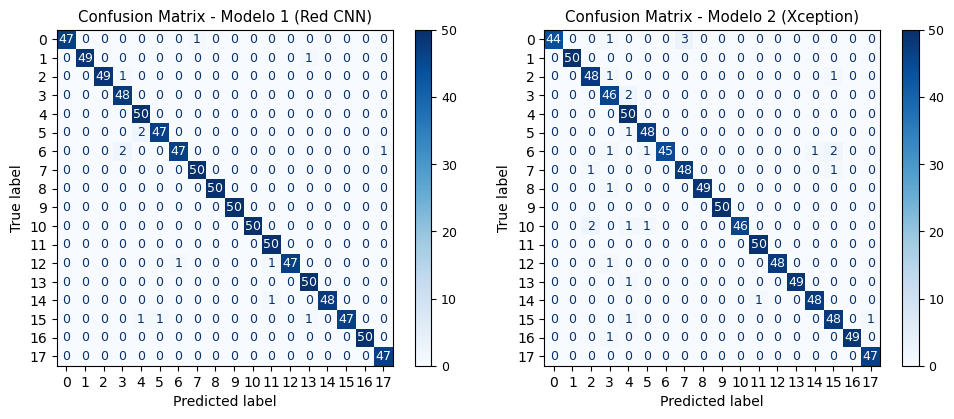

In [36]:
# Configura la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.rcParams['font.size'] = 9

# Dibuja la primera matriz de confusión
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_CNN)
disp1.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Confusion Matrix - Modelo 1 (Red CNN)')

# Dibuja la segunda matriz de confusión
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_Xception)
disp2.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Confusion Matrix - Modelo 2 (Xception)')

# Ajusta el diseño y muestra el gráfico
plt.tight_layout()
plt.show()

Based on the confusion matrices, we can deduce the following:
  - If we strictly consider the value of Accuracy, **Model_1** (Deep CNN) would be the winner, as the errors are practically nonexistent: A much larger test set would be needed to uncover the weaknesses of this model.
  - An analysis of metrics such as Recall, Precision, and F1-Score has been omitted, as we would obtain very low values for each class, making it difficult to provide relevant information in this case.
  - The only comment that can be made about both confusion matrices (aside from the low error rate) is that classes **number 6 (edna_krabappel)** and **number 10 (krusty_the_clown)** seem to have the highest error rate in **Model_2** (simplified Xception), although with a very small error value, so much so that it could fall within the random nature of weight initialization or the mixing of the dataset itself. However, this does not appear to be the case in **Model_1** (Deep CNN).

Therefore, in a very close call, we choose <font color='red'>**Model 1 as the winner**</font>, although either of the two models would equally suffice for the purpose pursued in this exercise.

---
